In [83]:
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [84]:
import os

# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

c:\Users\sambh\Desktop\ML-NoteBook


In [85]:
import numpy as np
import struct

In [87]:
import pandas as pd

df = pd.read_csv(current_working_directory+"\\Dataset\\Titanic-Dataset\\Titanic-Dataset.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [88]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [89]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1,inplace=True)


In [90]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


C:\Users\sambh\AppData\Local\Temp\ipykernel_26928\3445330535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)
C:\Users\sambh\AppData\Local\Temp\ipykernel_26928\3445330535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [93]:
# Convert DataFrame to NumPy array
data = df.to_numpy()

# Split features (X) and target (y)
# Convert DataFrame to NumPy array with float dtype
X = df.iloc[:, 1:].to_numpy(dtype=float)  # Convert features to float
y = df.iloc[:, 0].to_numpy(dtype=int)  # Target should be integer (0 or 1)


In [94]:
def train_test_split_manual(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)
X_test,X_train,y_test,y_train

(array([[ 3.    ,  0.    , 28.    , ...,  1.    , 15.2458,  1.    ],
        [ 2.    ,  0.    , 31.    , ...,  0.    , 10.5   ,  0.    ],
        [ 3.    ,  0.    , 20.    , ...,  0.    ,  7.925 ,  0.    ],
        ...,
        [ 3.    ,  0.    , 28.    , ...,  0.    ,  7.225 ,  1.    ],
        [ 3.    ,  1.    , 38.    , ...,  5.    , 31.3875,  0.    ],
        [ 2.    ,  1.    , 17.    , ...,  0.    , 10.5   ,  0.    ]]),
 array([[  3.    ,   1.    ,   4.    , ...,   1.    ,  16.7   ,   0.    ],
        [  1.    ,   0.    ,  45.5   , ...,   0.    ,  28.5   ,   0.    ],
        [  2.    ,   0.    ,  23.    , ...,   0.    ,  13.    ,   0.    ],
        ...,
        [  3.    ,   0.    ,  41.    , ...,   0.    ,  14.1083,   0.    ],
        [  1.    ,   1.    ,  14.    , ...,   2.    , 120.    ,   0.    ],
        [  1.    ,   0.    ,  21.    , ...,   1.    ,  77.2875,   0.    ]]),
 array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_class_regression(X, y, learning_rate=0.0001, epochs=10000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)  # Keep probability values

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Train model
weights, bias = train_class_regression(X_train, y_train)
weights,bias

(array([-0.10447962,  0.10357766, -0.0214571 , -0.06858683, -0.0065856 ,
         0.0127008 ,  0.01781279]),
 np.float64(-0.012443111682752268))

In [96]:
# Ensure X_test is a NumPy array
X_test = np.array(X_test, dtype=float)

# Function to predict values
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.array([1 if p > 0.5 else 0 for p in y_pred])  # Convert to integer labels

# Generate predictions
y_pred = predict(X_test, weights, bias)

# Now plot the predictions


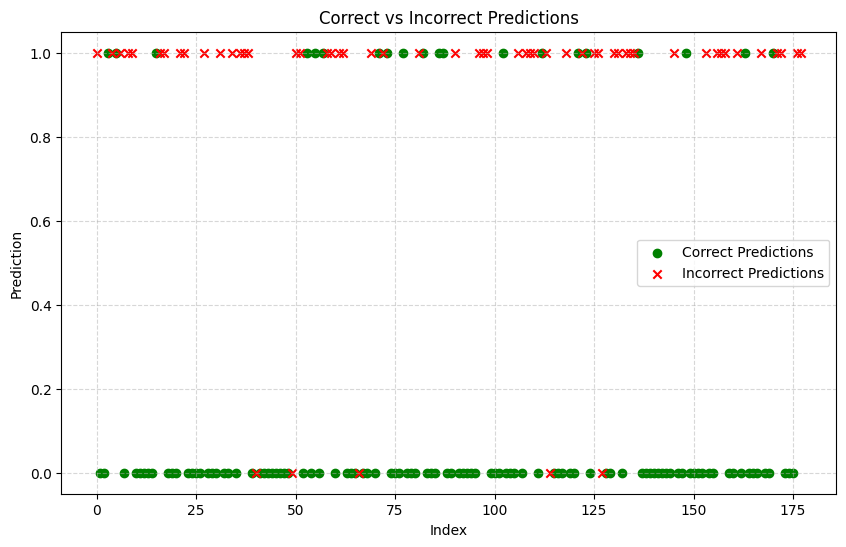

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Convert lists to numpy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Find correct and incorrect predictions
correct = (y_pred == y_test)
incorrect = (y_pred != y_test)

# Plot correctly predicted values in green
plt.figure(figsize=(10, 6))
plt.scatter(np.where(correct), y_test[correct], color="green", label="Correct Predictions", marker="o")
plt.scatter(np.where(incorrect), y_test[incorrect], color="red", label="Incorrect Predictions", marker="x")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Prediction")
plt.title("Correct vs Incorrect Predictions")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


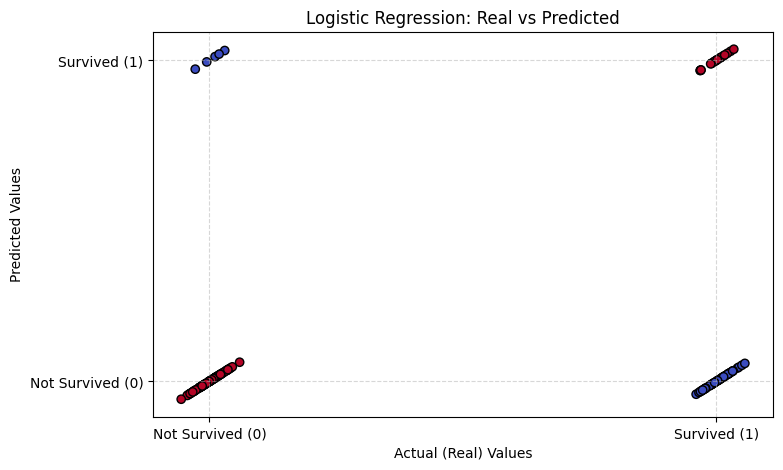

In [98]:


# Convert y_test and y_pred to NumPy arrays for easy manipulation
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Create figure
plt.figure(figsize=(8, 5))

# Scatter actual vs predicted (adding jitter for better visualization)
jitter = np.random.normal(0, 0.02, size=len(y_test))  # Small noise for separation
plt.scatter(y_test + jitter, y_pred + jitter, c=(y_test == y_pred), cmap="coolwarm", edgecolors="k")

# Labels and title
plt.xlabel("Actual (Real) Values")
plt.ylabel("Predicted Values")
plt.title("Logistic Regression: Real vs Predicted")

# Adjust x-axis
plt.xticks([0, 1], ["Not Survived (0)", "Survived (1)"])
plt.yticks([0, 1], ["Not Survived (0)", "Survived (1)"])

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [99]:
# Convert predictions to binary (0 or 1) if they are probabilities
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculate accuracy
correct_predictions = sum(y_test == y_pred_binary)
total_predictions = len(y_test)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 67.42%
